<h1> Notebook used to analyse results of the optimization.
<h2> It consist of:
<h3> - Evaluating convergence of optimization process
<h3> - Singular value analysis
<h3> - Distribution plots of objective function value over multiple runs
<h3> - Evaluating reconstruction of the basis
<h3> - Evaluation of system to optimize FWHM parameter of Lorentzian

In [23]:
import os
import torch
import numpy as np
import json
import pandas as pd
from glob import glob
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from utils_optimization.results_handling import load_best_run,extract_final_residuals,plot_kde_overlays
from utils_optimization.Set_up_dispersion_and_materials import *
from utils_optimization.functions_to_construct_objective_function import *

<h1> Gathering data from the runs

In [2]:
run_dir=[]
for i in range(0,11):
    best_run_dir=f'/Users/jaworskj/DataspellProjects/General_purpose_hyperspectral_thermal_camera/Lorentzian_function_approach/Small_sample_bandwidth_investigation/optimization_18_filters_with_{i}_bandwidth_id'
    run_dir.append(best_run_dir)

In [3]:
best_runs=[]
for run_dir in run_dir:
    best_run=load_best_run(run_dir)
    best_runs.append(best_run)

<h1> Convergence of optimization process

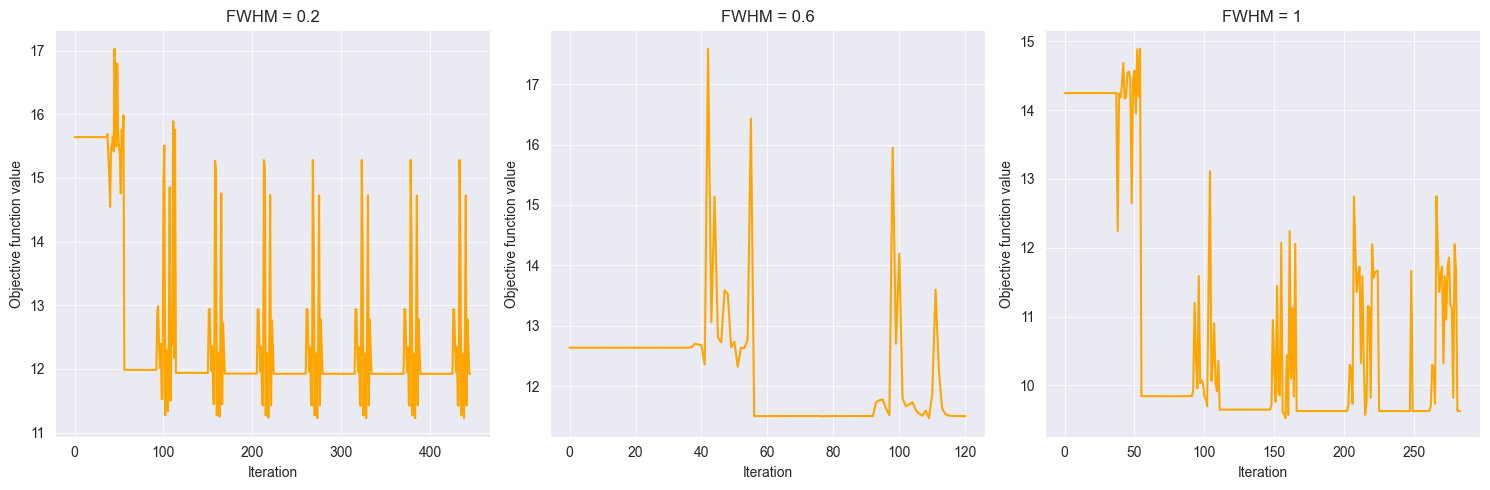

In [20]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(best_runs[0][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 0.2')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(best_runs[1][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 0.6')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(best_runs[2][1],color='orange')
plt.title('FWHM = 1')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

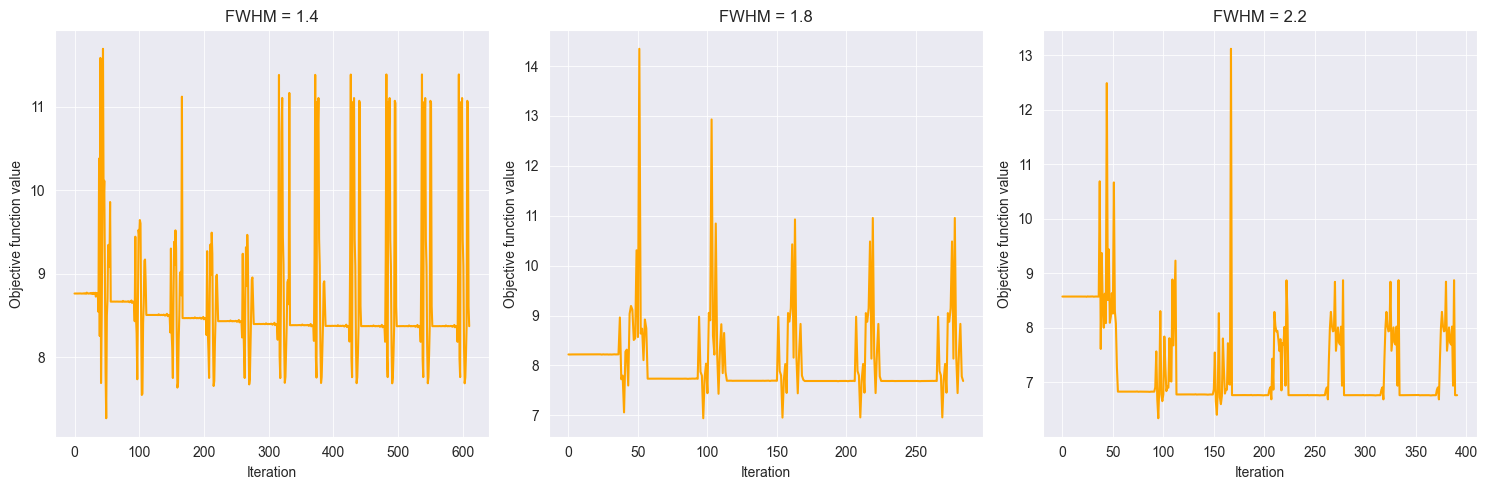

In [19]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(best_runs[3][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 1.4')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(best_runs[4][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 1.8')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(best_runs[5][1],color='orange')
plt.title('FWHM = 2.2')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

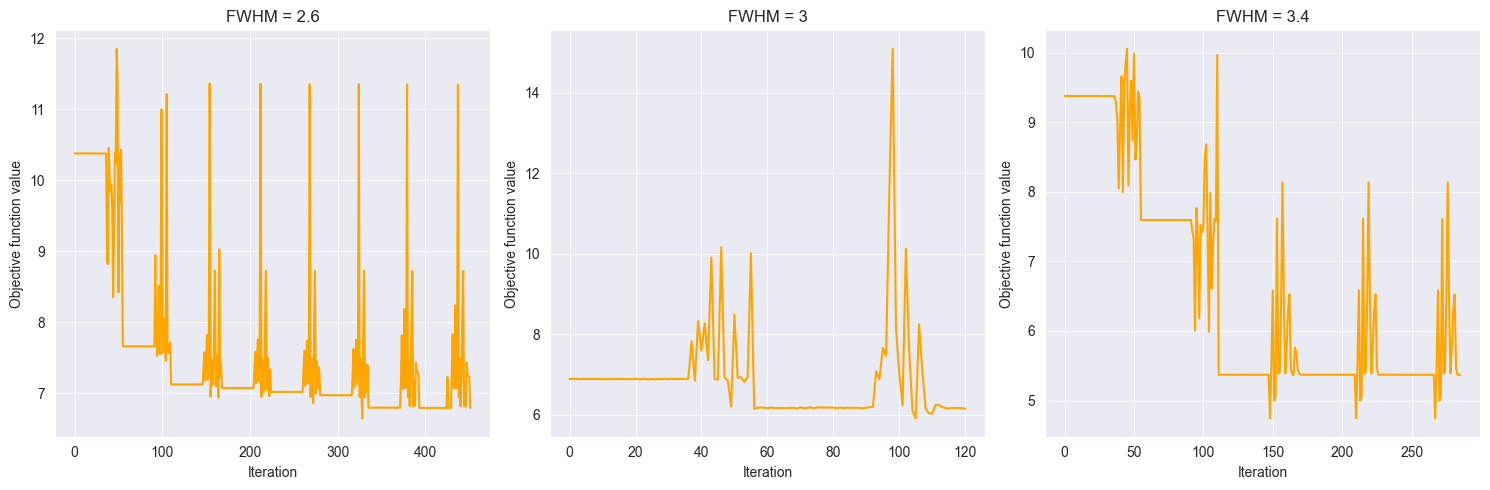

In [21]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(best_runs[6][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 2.6')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(best_runs[7][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 3')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(best_runs[8][1],color='orange')
plt.title('FWHM = 3.4')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

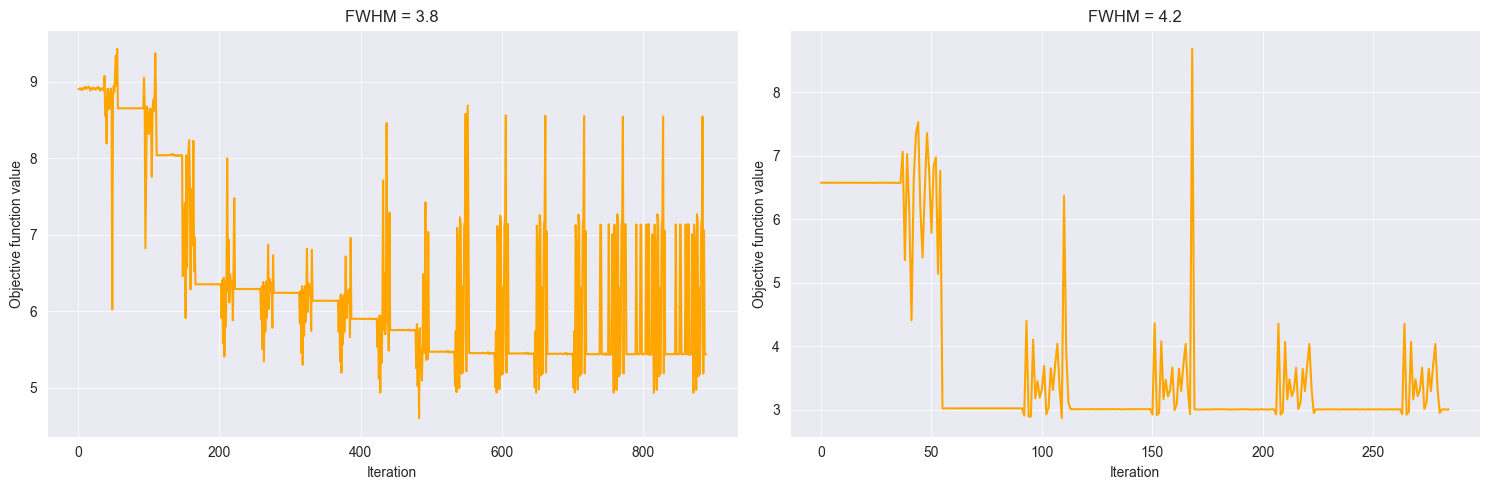

In [24]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.plot(best_runs[9][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 3.8')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 2, 2)
plt.plot(best_runs[10][1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('FWHM = 4.2')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

<h1> Singular values analysis

In [27]:
dtype=torch.float64
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Initialization of initial conditions
n=10 # Number of slots for filters in each of the wheel
# Range of wavelengths points
wavelengths=torch.linspace(8000,14000,n**2-1)*1e-9 # Expressed in [m] as tmm_torch library requires
# Angles of incidence
angles = torch.linspace(0, 89, 90)
Ti_mat,Au_mat,aSi_mat,env,subs=set_up_dispersion_and_materials(dtype,device)

In [28]:
sigma=[]
for i in range(11):
    Psi=filter_wheel(best_runs[i][0],n,Au_mat,Ti_mat,aSi_mat,env,subs,wavelengths,angles,dtype,device)
    _,s,_=torch.svd(Psi)
    sigma.append(s)


/Users/jaworskj/DataspellProjects/General_purpose_hyperspectral_thermal_camera/torch_tmm/model.py:168: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  n = layer.material.refractive_index(wavelengths).to(self.dtype).to(self.device)


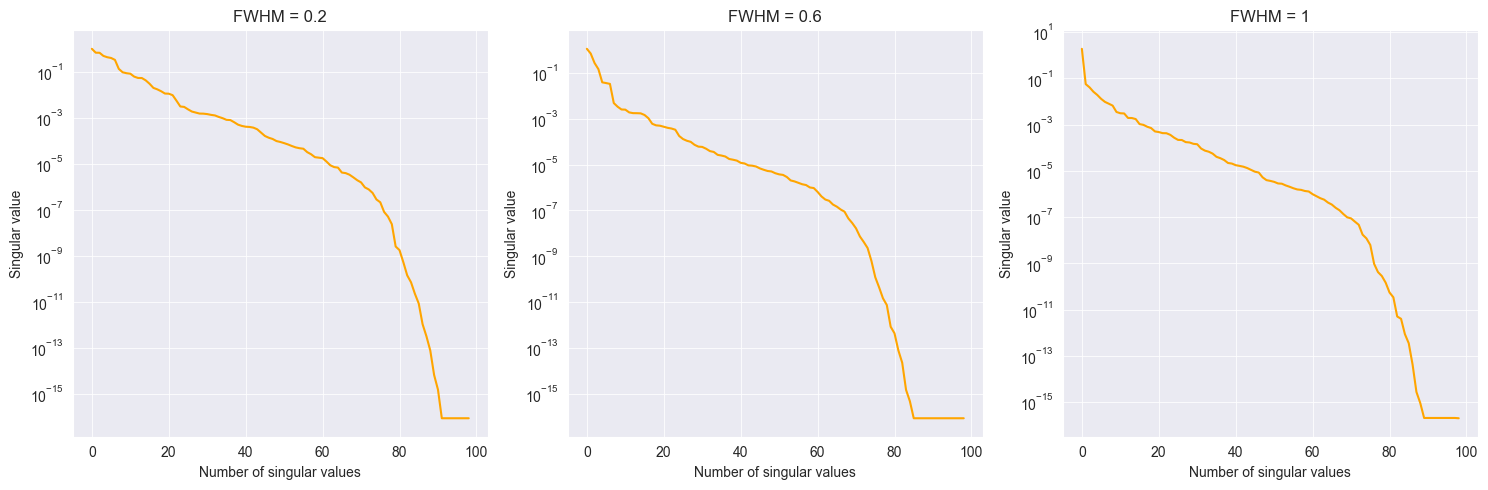

In [38]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.semilogy(sigma[0].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 0.2')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.semilogy(sigma[1].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 0.6')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.semilogy(sigma[2].detach(),color='orange')
plt.title('FWHM = 1')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

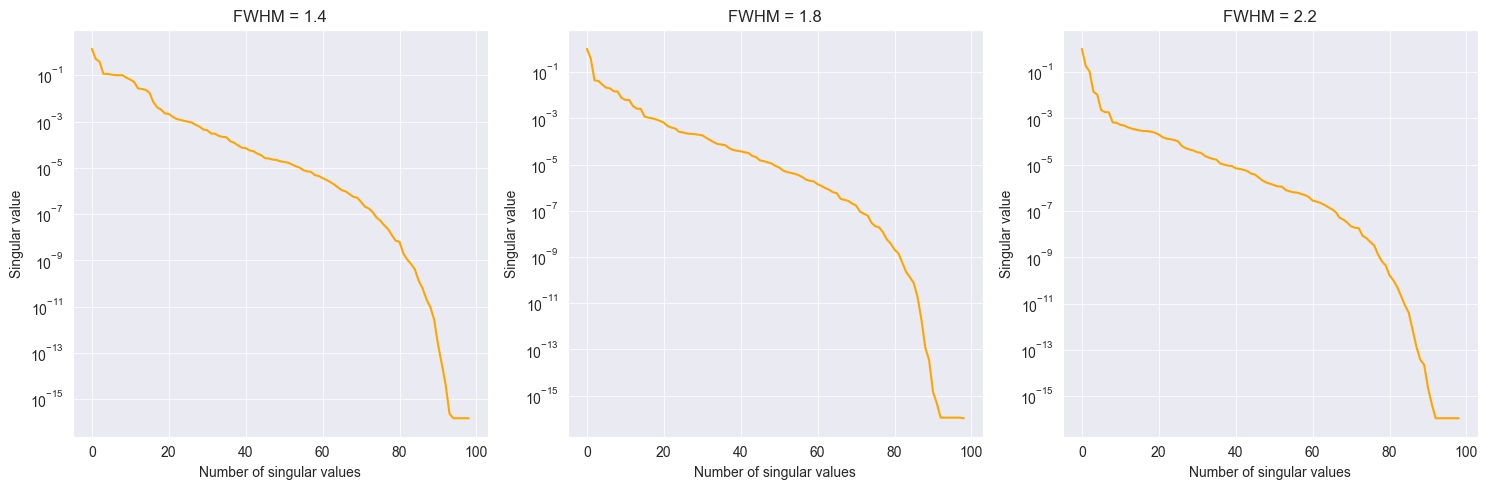

In [39]:
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.semilogy(sigma[3].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 1.4')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.semilogy(sigma[4].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 1.8')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.semilogy(sigma[5].detach(),color='orange')
plt.title('FWHM = 2.2')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

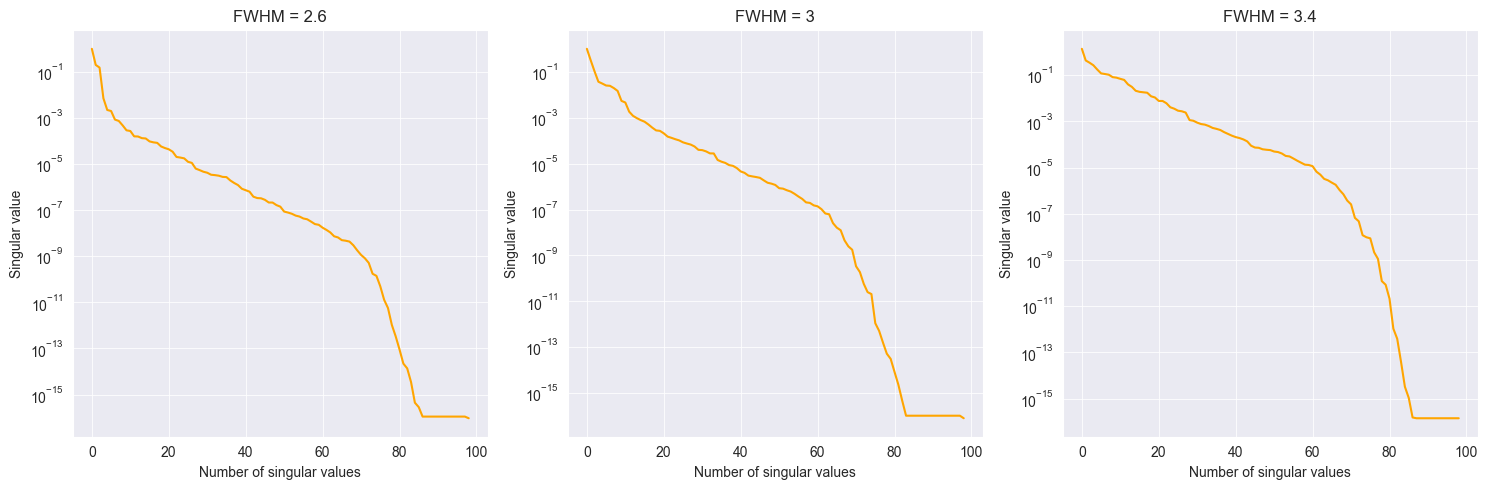

In [40]:
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.semilogy(sigma[6].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 2.6')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.semilogy(sigma[7].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 3')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.semilogy(sigma[8].detach(),color='orange')
plt.title('FWHM = 3.4')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

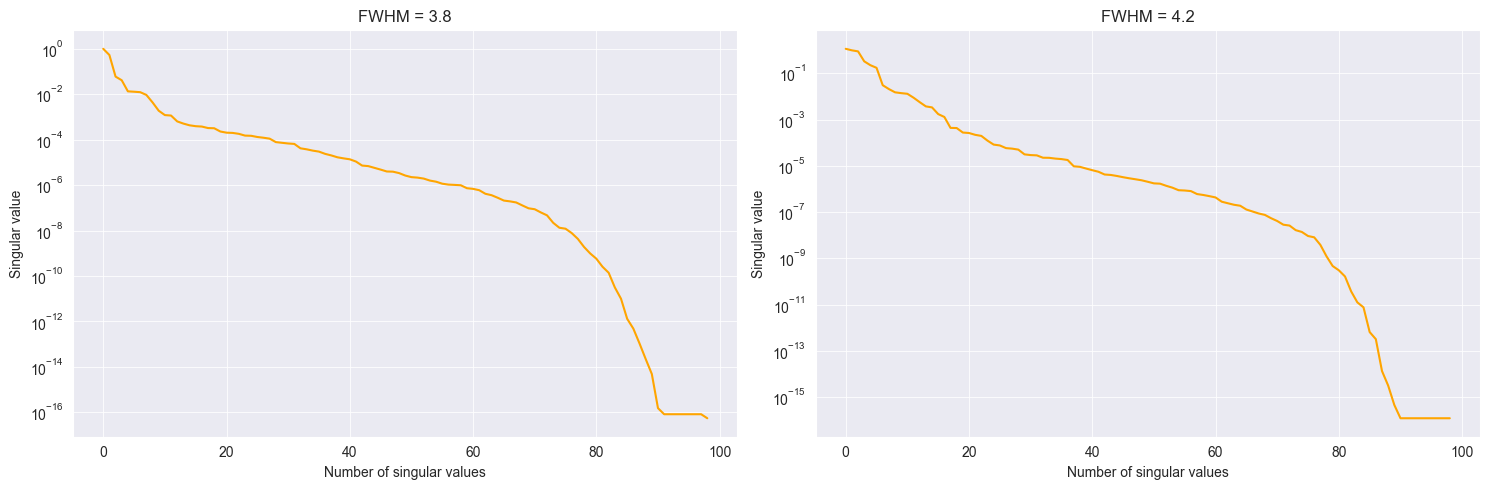

In [41]:
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.semilogy(sigma[9].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 3.8')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 2, 2)
plt.semilogy(sigma[10].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('FWHM = 4.2')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

<h1> Distribution of the final objective function values

In [3]:
all_last_obj_val=[]
for run in run_dir:
    last_obj_value=extract_final_residuals(run)
    all_last_obj_val.append(last_obj_value)

In [4]:
list_of_labels=[]
for i in range(11):
    label=f'FWHM = {round(0.2+0.4*i,1)}'
    list_of_labels.append(label)

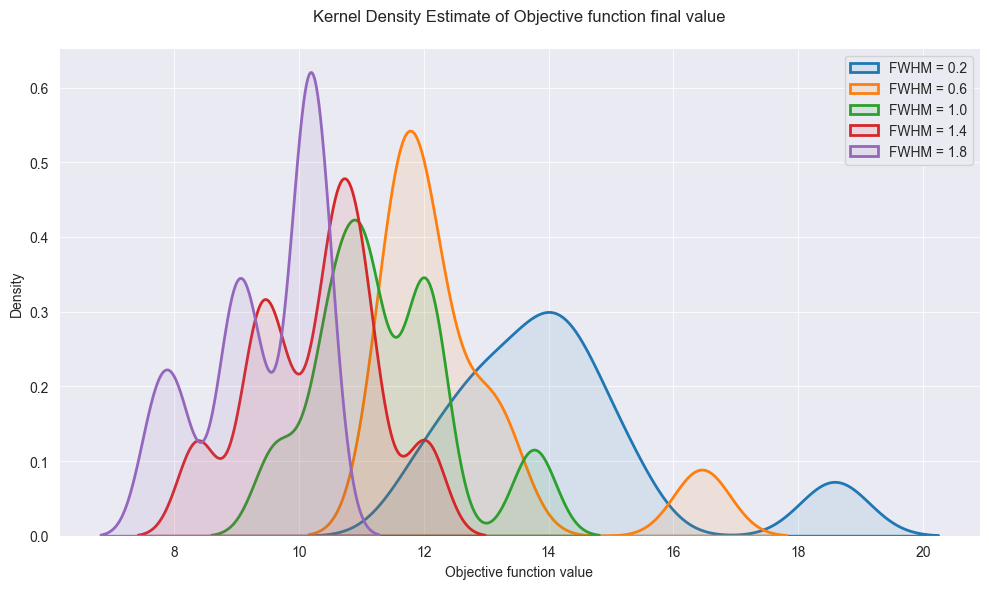

In [5]:
plot_kde_overlays(all_last_obj_val[0:5],labels=list_of_labels[0:5],alpha=0.1)

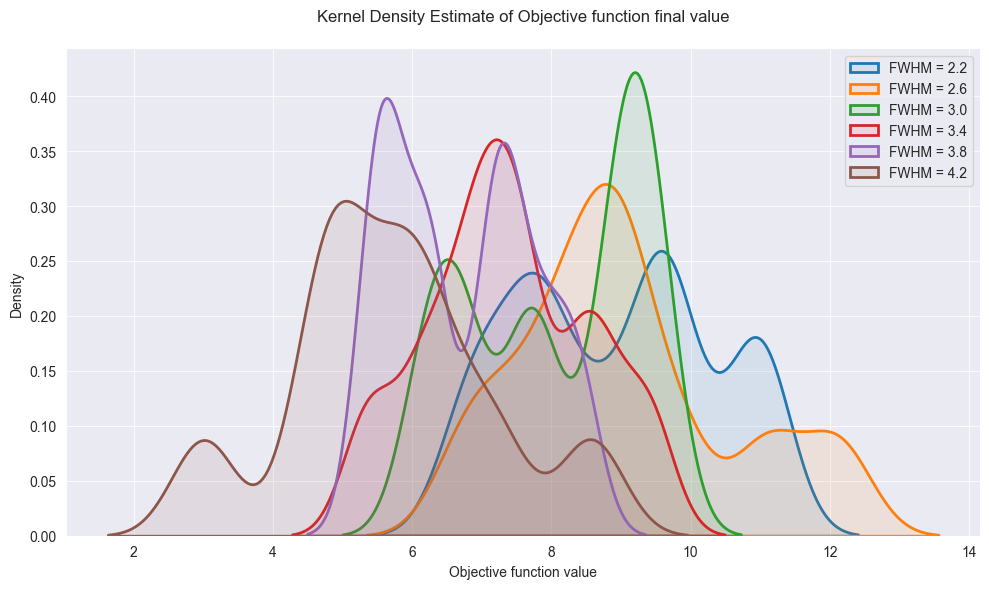

In [6]:
plot_kde_overlays(all_last_obj_val[5:],labels=list_of_labels[5:],alpha=0.1)

<h1> Reconstruction of the continuous basis

In [4]:
dtype=torch.float64
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Initialization of initial conditions
n=10 # Number of slots for filters in each of the wheel
# Range of wavelengths points
wavelengths=torch.linspace(8000,14000,n**2-1)*1e-9 # Expressed in [m] as tmm_torch library requires
# Angles of incidence
angles = torch.linspace(0, 89, 90)
Ti_mat,Au_mat,aSi_mat,env,subs=set_up_dispersion_and_materials(dtype,device)

In [5]:
lorentzian_approximation=[]
Lorentzian_base=[]
for i in range(11):
    params=best_runs[i][0]
    Psi=filter_wheel(params,n,Au_mat,Ti_mat,aSi_mat,env,subs,wavelengths,angles,dtype,device)
    Lorentzian=lorentzian(wavelengths,0.2+0.4*i,dtype,device)
    C=Psi@Lorentzian
    Lorentzian_app=torch.linalg.lstsq(Psi,C,driver='gelsd')
    Lorentzian_app=Lorentzian_app[0]
    Lorentzian_app[Lorentzian_app<0]=0
    Lorentzian_base.append(Lorentzian)
    lorentzian_approximation.append(Lorentzian_app)

/Users/jaworskj/DataspellProjects/General_purpose_hyperspectral_thermal_camera/torch_tmm/model.py:168: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  n = layer.material.refractive_index(wavelengths).to(self.dtype).to(self.device)


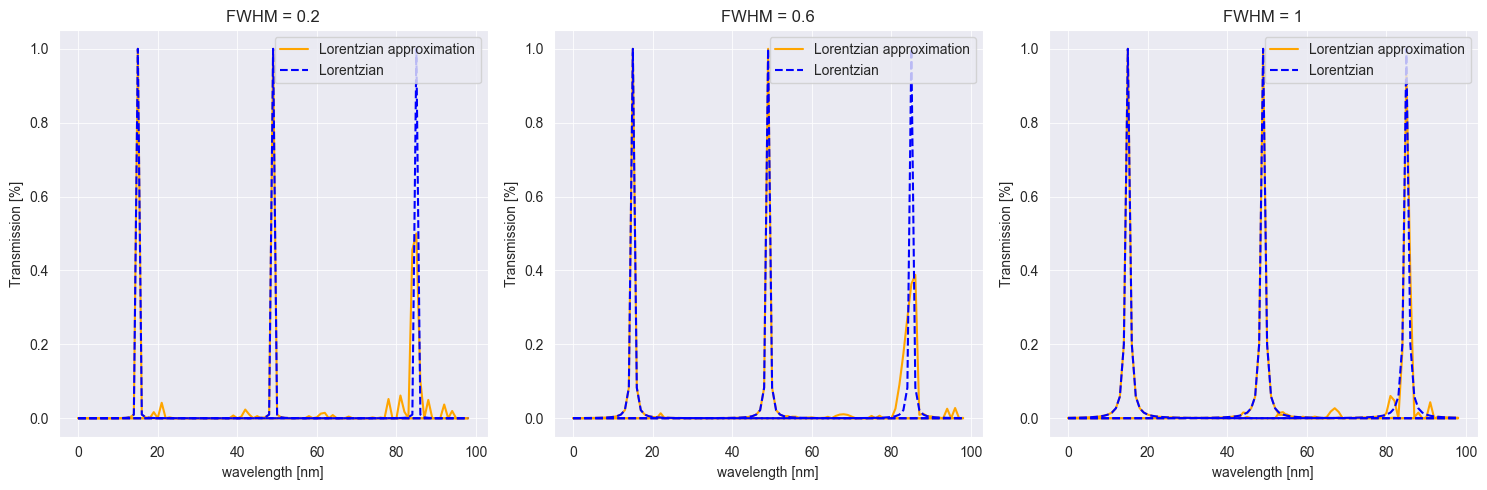

In [22]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(lorentzian_approximation[0][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[0][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[0][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[0][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[0][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[0][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 0.2')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(lorentzian_approximation[1][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[1][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[1][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[1][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[1][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[1][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 0.6')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(lorentzian_approximation[2][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[2][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[2][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[2][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[2][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[2][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 1')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

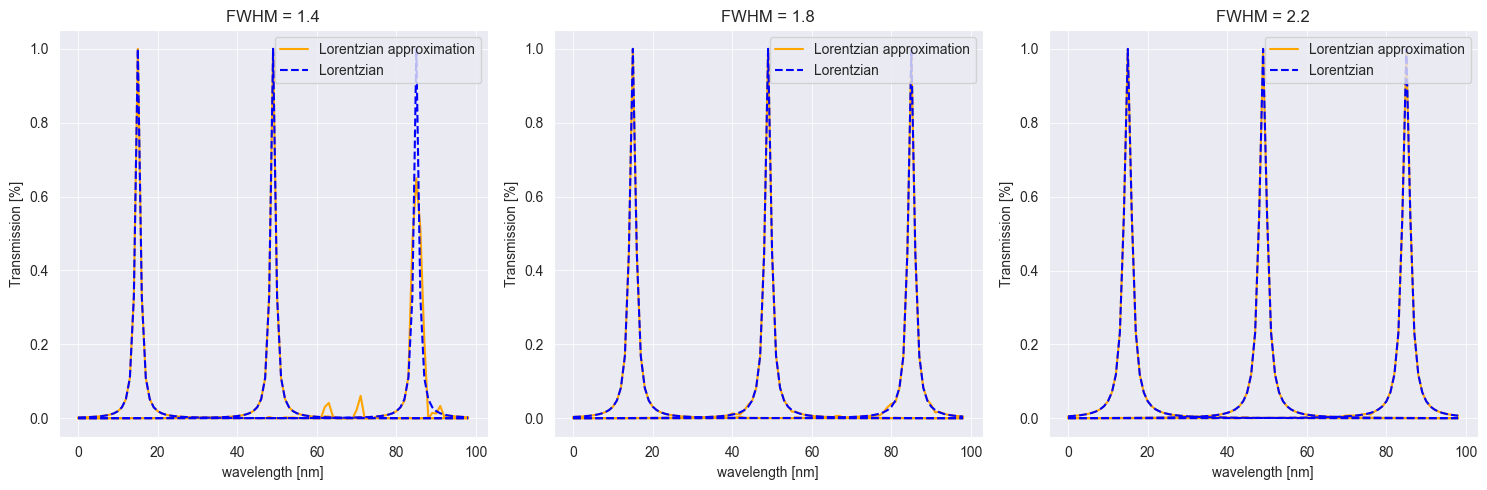

In [23]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(lorentzian_approximation[3][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[3][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[3][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[3][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[3][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[3][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 1.4')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(lorentzian_approximation[4][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[4][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[4][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[4][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[4][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[4][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 1.8')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(lorentzian_approximation[5][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[5][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[5][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[5][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[5][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[5][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 2.2')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

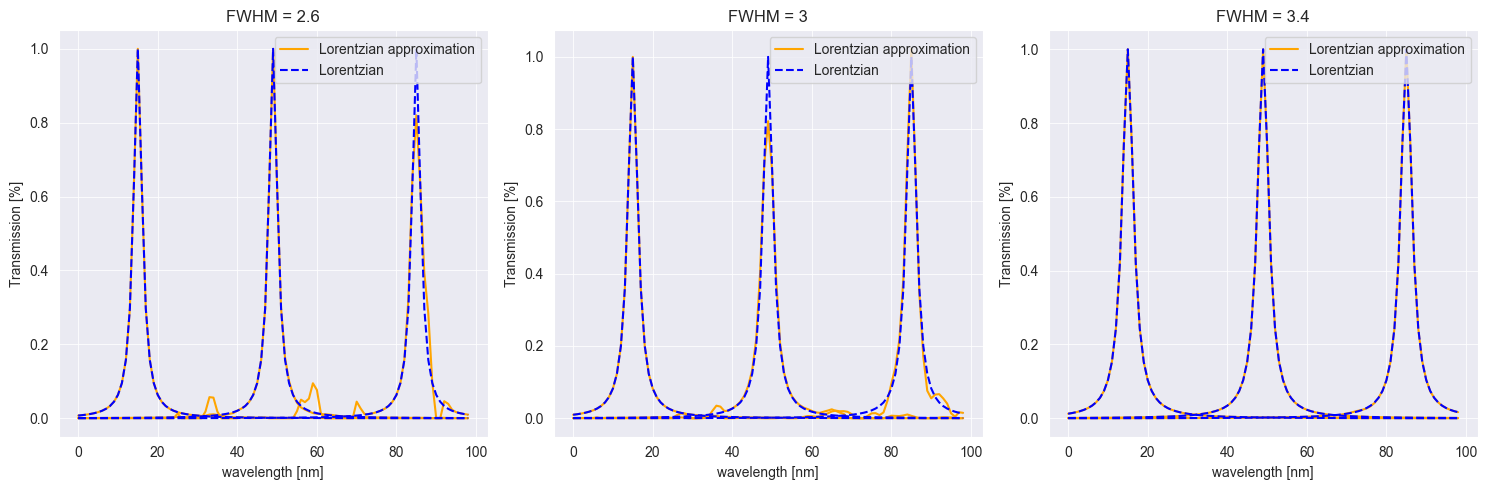

In [24]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(lorentzian_approximation[6][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[6][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[6][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[6][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[6][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[6][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 2.6')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(lorentzian_approximation[7][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[7][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[7][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[7][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[7][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[7][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 3')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(lorentzian_approximation[8][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[8][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[8][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[8][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[8][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[8][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 3.4')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

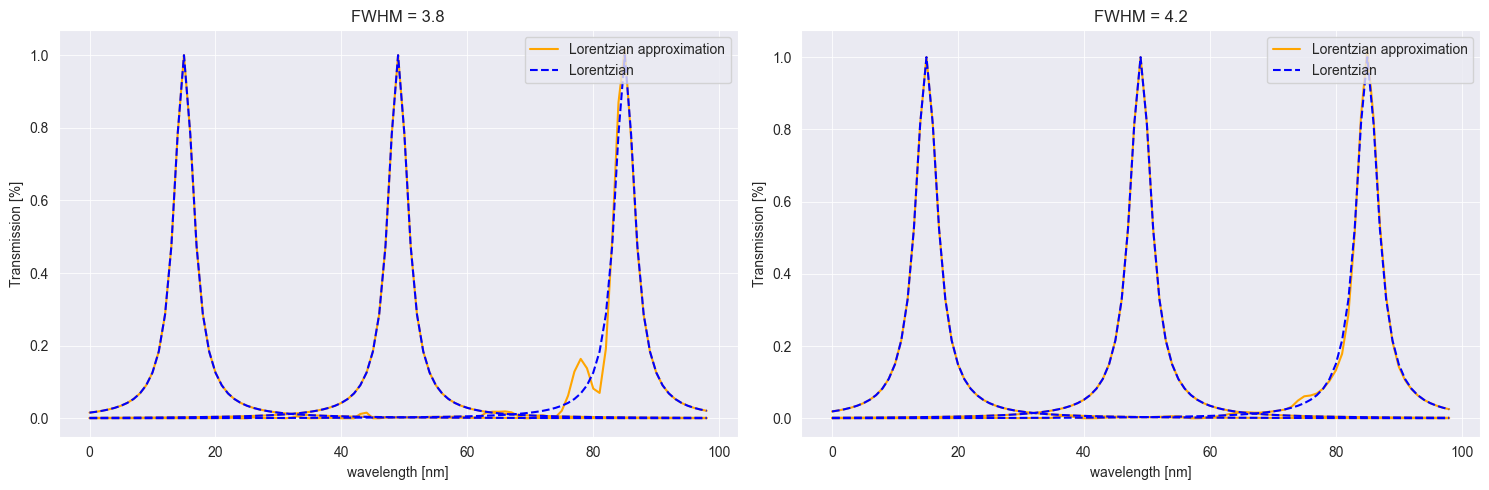

In [25]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.plot(lorentzian_approximation[9][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[9][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[9][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[9][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[9][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[9][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 3.8')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 2, 2)
plt.plot(lorentzian_approximation[10][15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(lorentzian_approximation[10][49].detach(),label='__nolabel__',color='orange')
plt.plot(lorentzian_approximation[10][85].detach(),label='__nolabel__',color='orange')
plt.plot(Lorentzian_base[10][15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(Lorentzian_base[10][49].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(Lorentzian_base[10][85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('FWHM = 4.2')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)



plt.tight_layout()
plt.show()

<h1> Optimization of FWHM parameters through different algorithms

In [24]:
powell_dir='/Users/jaworskj/DataspellProjects/General_purpose_hyperspectral_thermal_camera/powell_runs'

In [25]:
nelder_dir='/Users/jaworskj/DataspellProjects/General_purpose_hyperspectral_thermal_camera/nelder_runs'

In [26]:
lsq_dir='/Users/jaworskj/DataspellProjects/General_purpose_hyperspectral_thermal_camera/lsq_runs'

In [27]:
best_powell=load_best_run(powell_dir)
best_nelder=load_best_run(nelder_dir)
best_lsq=load_best_run(lsq_dir)

<h1>Convergence curves analysis

Text(0.5, 1.0, 'Convergence curve of LSQ algorithm')

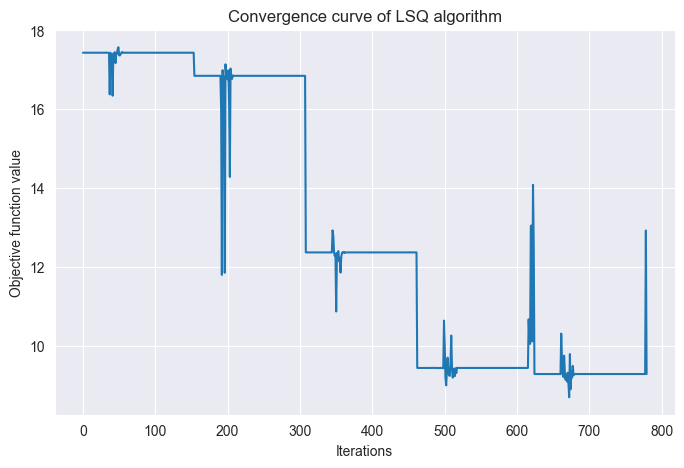

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(best_lsq[1])
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.title("Convergence curve of LSQ algorithm")

Text(0.5, 1.0, 'Convergence curve of Nelder-Mead algorithm')

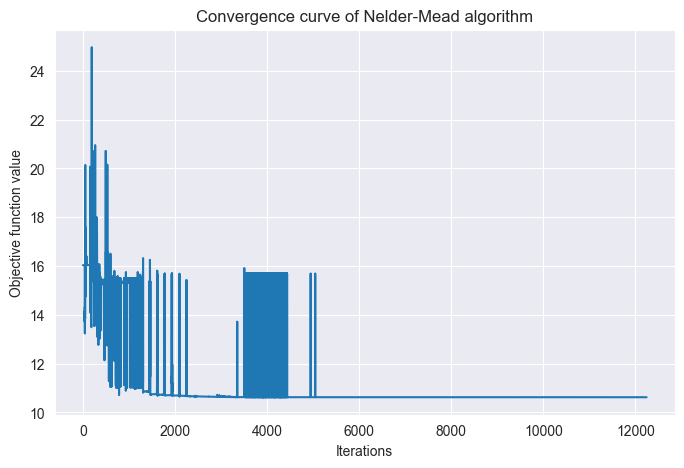

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(best_nelder[1])
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.title("Convergence curve of Nelder-Mead algorithm")

Text(0.5, 1.0, 'Convergence curve of Powell algorithm')

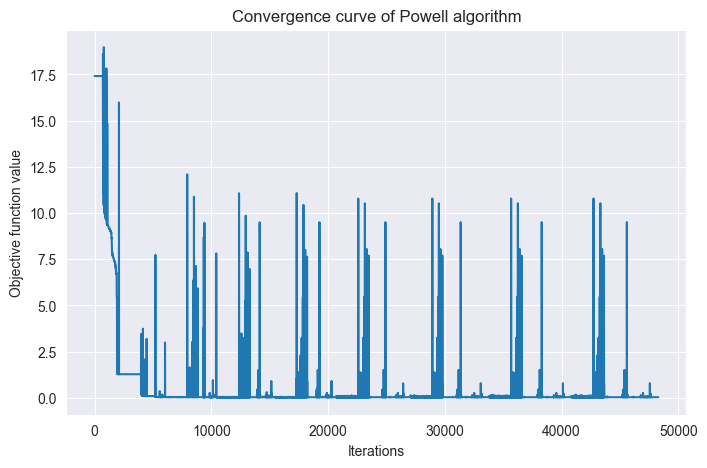

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(best_powell[1])
plt.xlabel('Iterations')
plt.ylabel('Objective function value')
plt.title("Convergence curve of Powell algorithm")

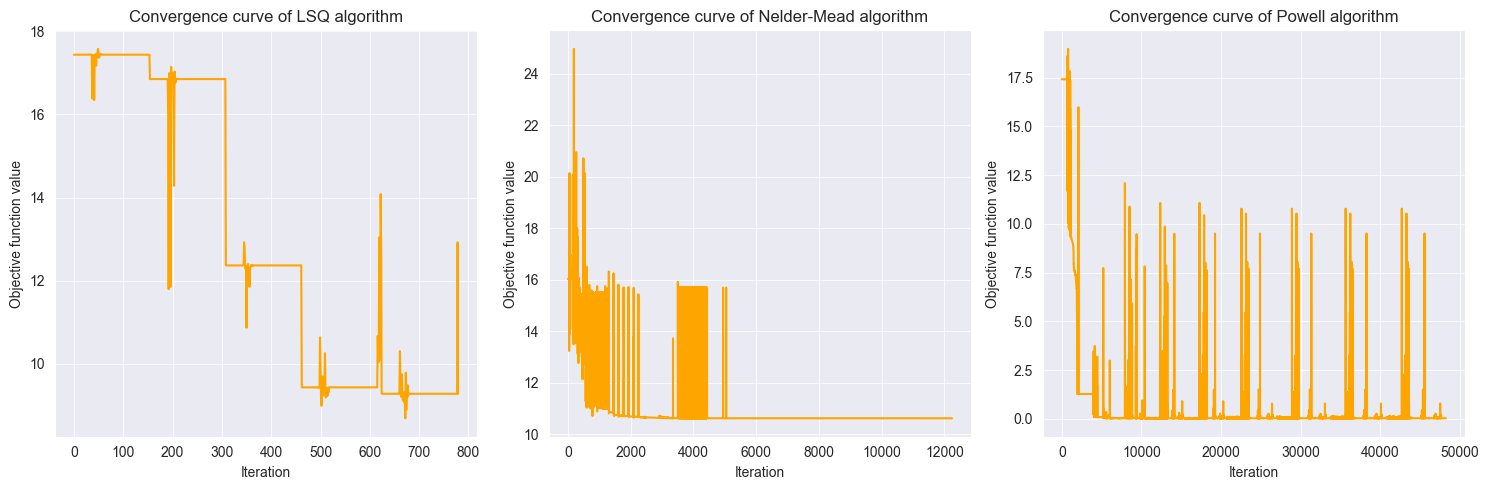

In [31]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(best_lsq[1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('Convergence curve of LSQ algorithm')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(best_nelder[1],color='orange')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.title('Convergence curve of Nelder-Mead algorithm')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(best_powell[1],color='orange')
plt.title('Convergence curve of Powell algorithm')
plt.ylabel('Objective function value')
plt.xlabel('Iteration')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

In [32]:
best_lsq[1][-1]

9.282412928787323

In [33]:
best_nelder[1][-1]

10.62288223707248

In [34]:
best_powell[1][-1]

0.03250441573709037

<h1>Spread of the FWHM parameters

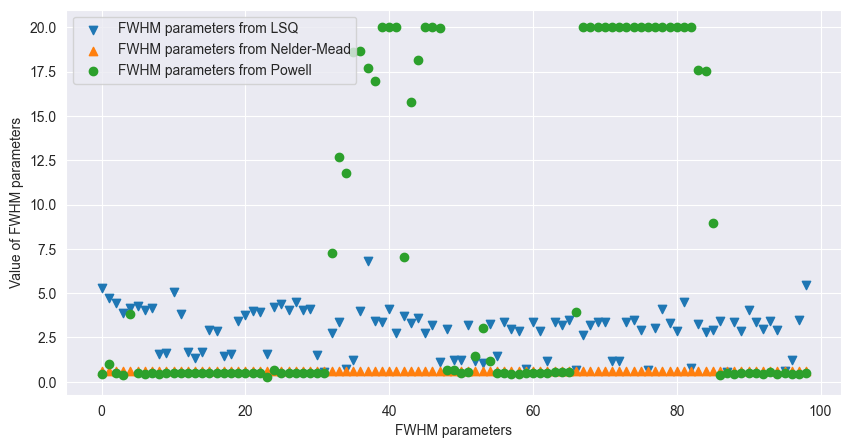

In [35]:
plt.figure(figsize=(10, 5))
x=torch.arange(0,99)
plt.scatter(x.detach().numpy(),best_lsq[0][54:].detach().numpy(),label='FWHM parameters from LSQ',marker='v')
plt.scatter(x.detach().numpy(),best_nelder[0][54:].detach().numpy(),label='FWHM parameters from Nelder-Mead',marker='^')
plt.scatter(x.detach().numpy(),best_powell[0][54:].detach().numpy(),label='FWHM parameters from Powell')
plt.xlabel('FWHM parameters')
plt.ylabel('Value of FWHM parameters')
plt.legend()

<h1> Singular value analysis

In [36]:
dtype = torch.float64
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Initialization of initial conditions
n = 10  # Number of slots for filters in each of the wheel
# Range of wavelengths points
wavelengths = torch.linspace(8000, 14000, n ** 2 - 1) * 1e-9  # Expressed in [m] as tmm_torch library requires
# Angles of incidence
angles = torch.linspace(0, 89, 90)
Ti_mat, Au_mat, aSi_mat, env, subs = set_up_dispersion_and_materials(dtype, device)

In [37]:
sigma = []

Psi_lsq = filter_wheel(best_lsq[0][:54], n, Au_mat, Ti_mat, aSi_mat, env, subs, wavelengths, angles, dtype, device)
_, s, _ = torch.svd(Psi_lsq)
sigma.append(s)

Psi_nelder = filter_wheel(best_nelder[0][:54], n, Au_mat, Ti_mat, aSi_mat, env, subs, wavelengths, angles, dtype, device)
_, s, _ = torch.svd(Psi_nelder)
sigma.append(s)

Psi_powell = filter_wheel(best_powell[0][:54], n, Au_mat, Ti_mat, aSi_mat, env, subs, wavelengths, angles, dtype, device)
_, s, _ = torch.svd(Psi_powell)
sigma.append(s)

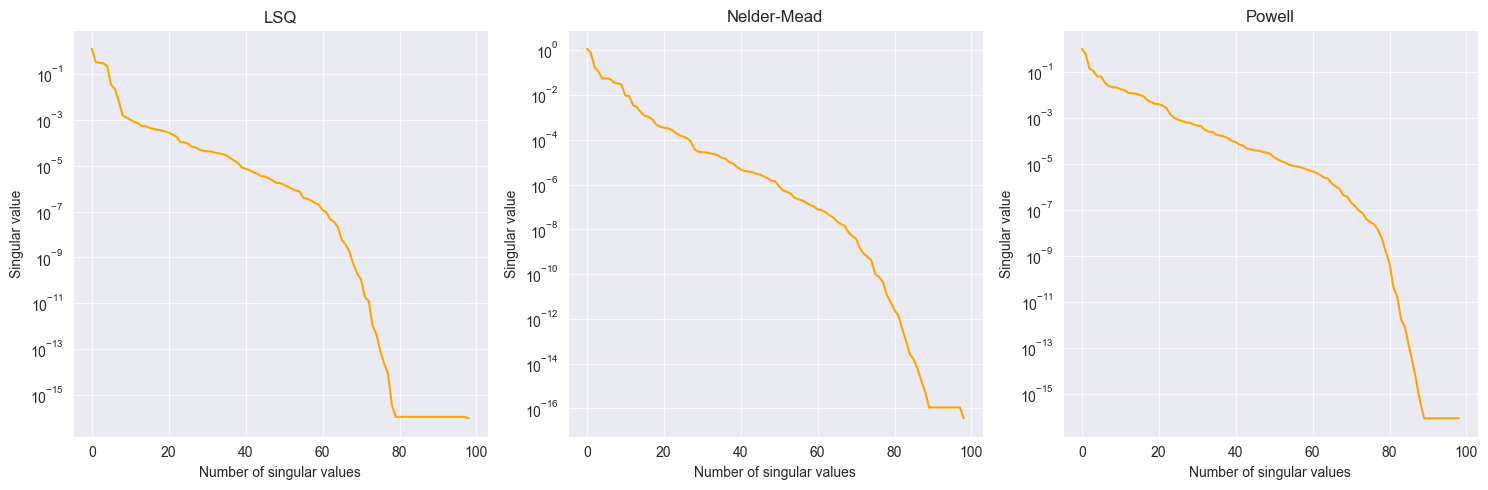

In [38]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.semilogy(sigma[0].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('LSQ')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.semilogy(sigma[1].detach(),color='orange')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.title('Nelder-Mead')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.semilogy(sigma[2].detach(),color='orange')
plt.title('Powell')
plt.ylabel('Singular value')
plt.xlabel('Number of singular values')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

<h1> Reconstruction of the Lorentzian

In [39]:
lorentzian_approximation=[]
Lorentzian_base=[]

# Appending reconstruction of Lorentzian using LSQ
params=best_lsq[0]
Psi=filter_wheel(params[:(n-1)*6],n,Au_mat,Ti_mat,aSi_mat,env,subs,wavelengths,angles,dtype,device)
Lorentzian=lorentzian_diff_eta(wavelengths,params[(n-1)*6:],dtype,device)
C=Psi@Lorentzian
Lorentzian_app=torch.linalg.lstsq(Psi,C,driver='gelsd')
Lorentzian_app=Lorentzian_app[0]
Lorentzian_app[Lorentzian_app<0]=0
Lorentzian_base.append(Lorentzian)
lorentzian_approximation.append(Lorentzian_app)

# Appending reconstruction of Lorentzian using Nelder-Mead
params=best_nelder[0]
Psi=filter_wheel(params[:(n-1)*6],n,Au_mat,Ti_mat,aSi_mat,env,subs,wavelengths,angles,dtype,device)
Lorentzian=lorentzian_diff_eta(wavelengths,params[(n-1)*6:],dtype,device)
C=Psi@Lorentzian
Lorentzian_app=torch.linalg.lstsq(Psi,C,driver='gelsd')
Lorentzian_app=Lorentzian_app[0]
Lorentzian_app[Lorentzian_app<0]=0
Lorentzian_base.append(Lorentzian)
lorentzian_approximation.append(Lorentzian_app)

# Appending reconstruction of Lorentzian using Nelder-Mead
params=best_powell[0]
Psi=filter_wheel(params[:(n-1)*6],n,Au_mat,Ti_mat,aSi_mat,env,subs,wavelengths,angles,dtype,device)
Lorentzian=lorentzian_diff_eta(wavelengths,params[(n-1)*6:],dtype,device)
C=Psi@Lorentzian
Lorentzian_app=torch.linalg.lstsq(Psi,C,driver='gelsd')
Lorentzian_app=Lorentzian_app[0]
Lorentzian_app[Lorentzian_app<0]=0
Lorentzian_base.append(Lorentzian)
lorentzian_approximation.append(Lorentzian_app)



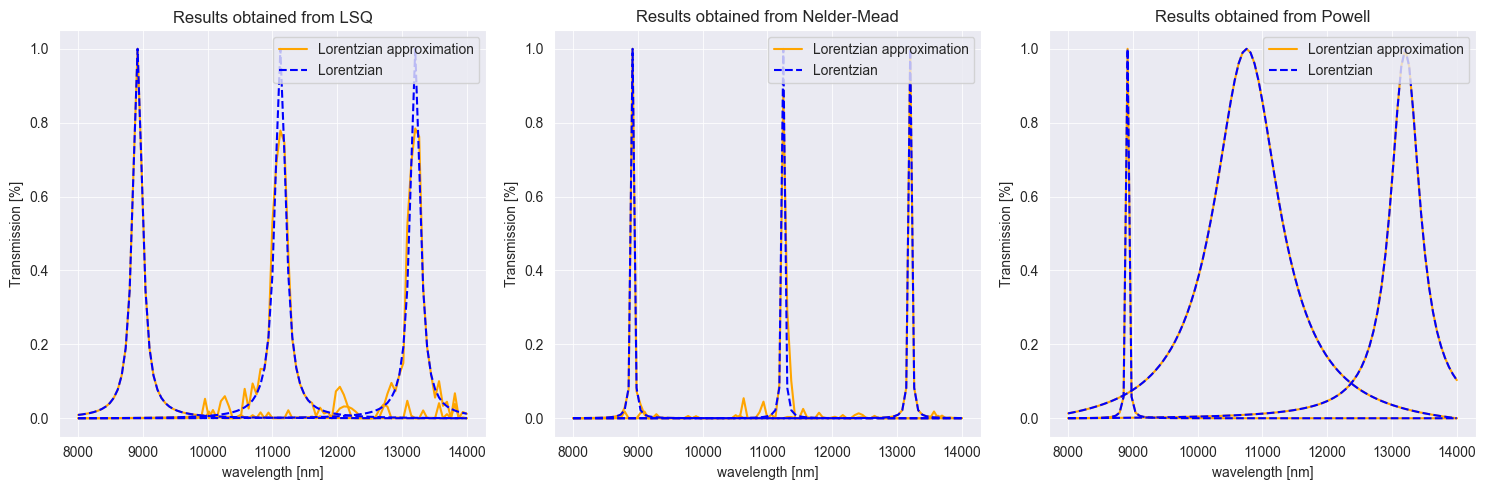

In [48]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[0][:,15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[0][:,51].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[0][:,85].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[0][:,15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[0][:,51].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[0][:,85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('Results obtained from LSQ')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[1][:,15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[1][:,53].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[1][:,85].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[1][:,15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[1][:,53].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[1][:,85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('Results obtained from Nelder-Mead')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,15].detach(),label='Lorentzian approximation',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,45].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,85].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,15].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,45].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,85].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('Results obtained from Powell')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()

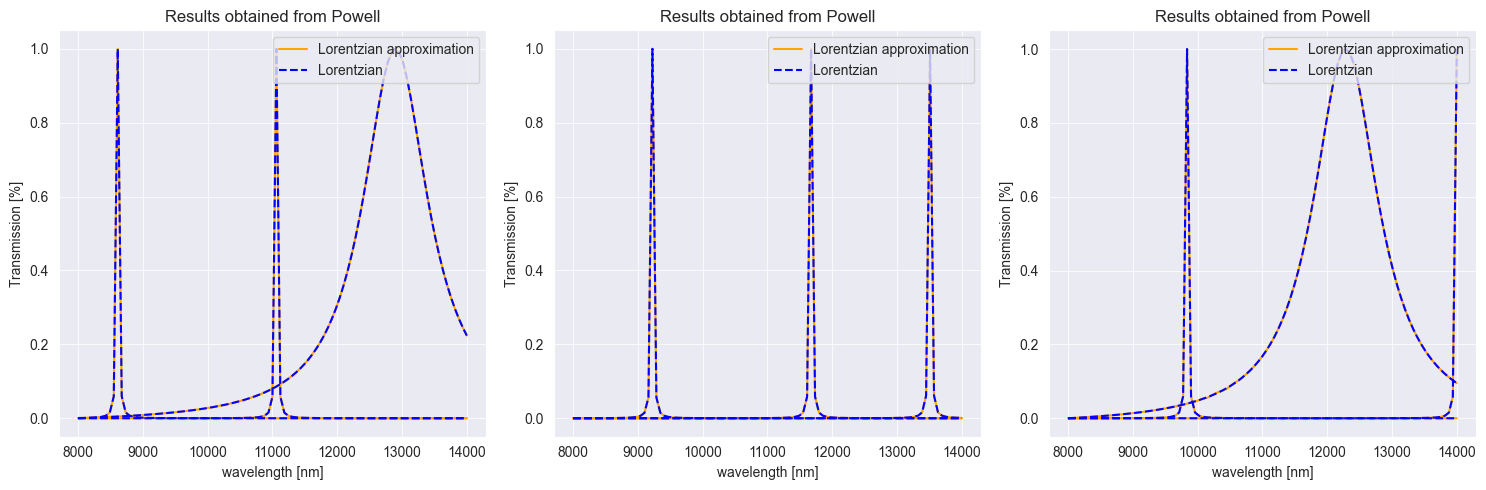

In [50]:
# Create 3 subplots side by side
plt.figure(figsize=(15, 5))

# First plot
plt.subplot(1, 3, 1)  # (rows, columns, index)
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,10].detach(),label='Lorentzian approximation',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,50].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,80].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,10].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,50].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,80].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('Results obtained from Powell')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Second plot
plt.subplot(1, 3, 2)
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,20].detach(),label='Lorentzian approximation',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,60].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,90].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,20].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,60].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,90].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('Results obtained from Powell')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

# Third plot
plt.subplot(1, 3, 3)
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,30].detach(),label='Lorentzian approximation',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,70].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,lorentzian_approximation[2][:,98].detach(),label='__nolabel__',color='orange')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,30].detach(),label='Lorentzian',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,70].detach(),label='__nolabel__',color='blue',ls='--')
plt.plot(wavelengths.detach()*1e9,Lorentzian_base[2][:,98].detach(),label='__nolabel__',color='blue',ls='--')
plt.ylabel('Transmission [%]')
plt.xlabel('wavelength [nm]')
plt.title('Results obtained from Powell')
plt.legend(loc='upper right')
plt.grid(alpha=0.8)

plt.tight_layout()
plt.show()